## Solar Energy Generation Prediction model

 ### 1.(a) Project Overview  


 
In this project, we aim to prepare a predictive model for solar energy generation. By focusing on data cleaning, feature engineering, and EDA


### 1.(b) Goal of the project


   The goal is to create predictive model for solar energy output


### 2. DATA COLLECTION AND UNDERSTANDING


## Dataset Overview
This dataset contains records on solar energy generation, temperature, humidity, weather conditions, and other variables. The dataset is sourced for clean energy analytics and includes information necessary for building predictive models.


In [8]:
! pip install pandas
! pip install numpy
! pip install seaborn 
! pip install matplotlib

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('SOLARENERGY.csv')

In [11]:
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


### 3.Data Preprocessing

### 3.(a) Data Cleaning

In [14]:
df.shape

(4213, 21)

In [15]:
df.sample(5)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
2020,23.68,41,1013.0,0.0,0.0,10.0,0,10,10,686.19,...,329.53,14.02,330.80,13.04,332.02,10.80,38.774852,28.919806,118.69515,2520.71270
1959,20.40,39,1021.1,0.0,0.0,0.0,0,0,0,614.10,...,18.43,13.24,22.38,12.77,21.50,12.60,49.807193,39.369385,102.97142,2238.79600
1020,10.06,70,1023.4,0.0,0.0,100.0,100,100,0,299.93,...,45.00,15.82,48.69,14.51,46.01,14.04,58.545114,60.097365,106.10870,858.94361
903,14.56,39,1029.6,0.0,0.0,0.0,0,0,0,808.12,...,36.25,21.60,36.87,20.09,36.25,20.52,10.000219,36.378975,183.27706,2882.34060
1216,14.85,49,1016.1,0.1,0.0,100.0,0,100,10,340.87,...,273.01,7.20,270.00,6.84,270.00,12.60,65.674485,60.828567,263.67753,147.91361


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [17]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

Dataset contains no null values 

In [19]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [20]:
## Checking duplicates 
df.duplicated().sum()

0

Dataset conatins no duplicate values

### 3.(b) Outlier Management 


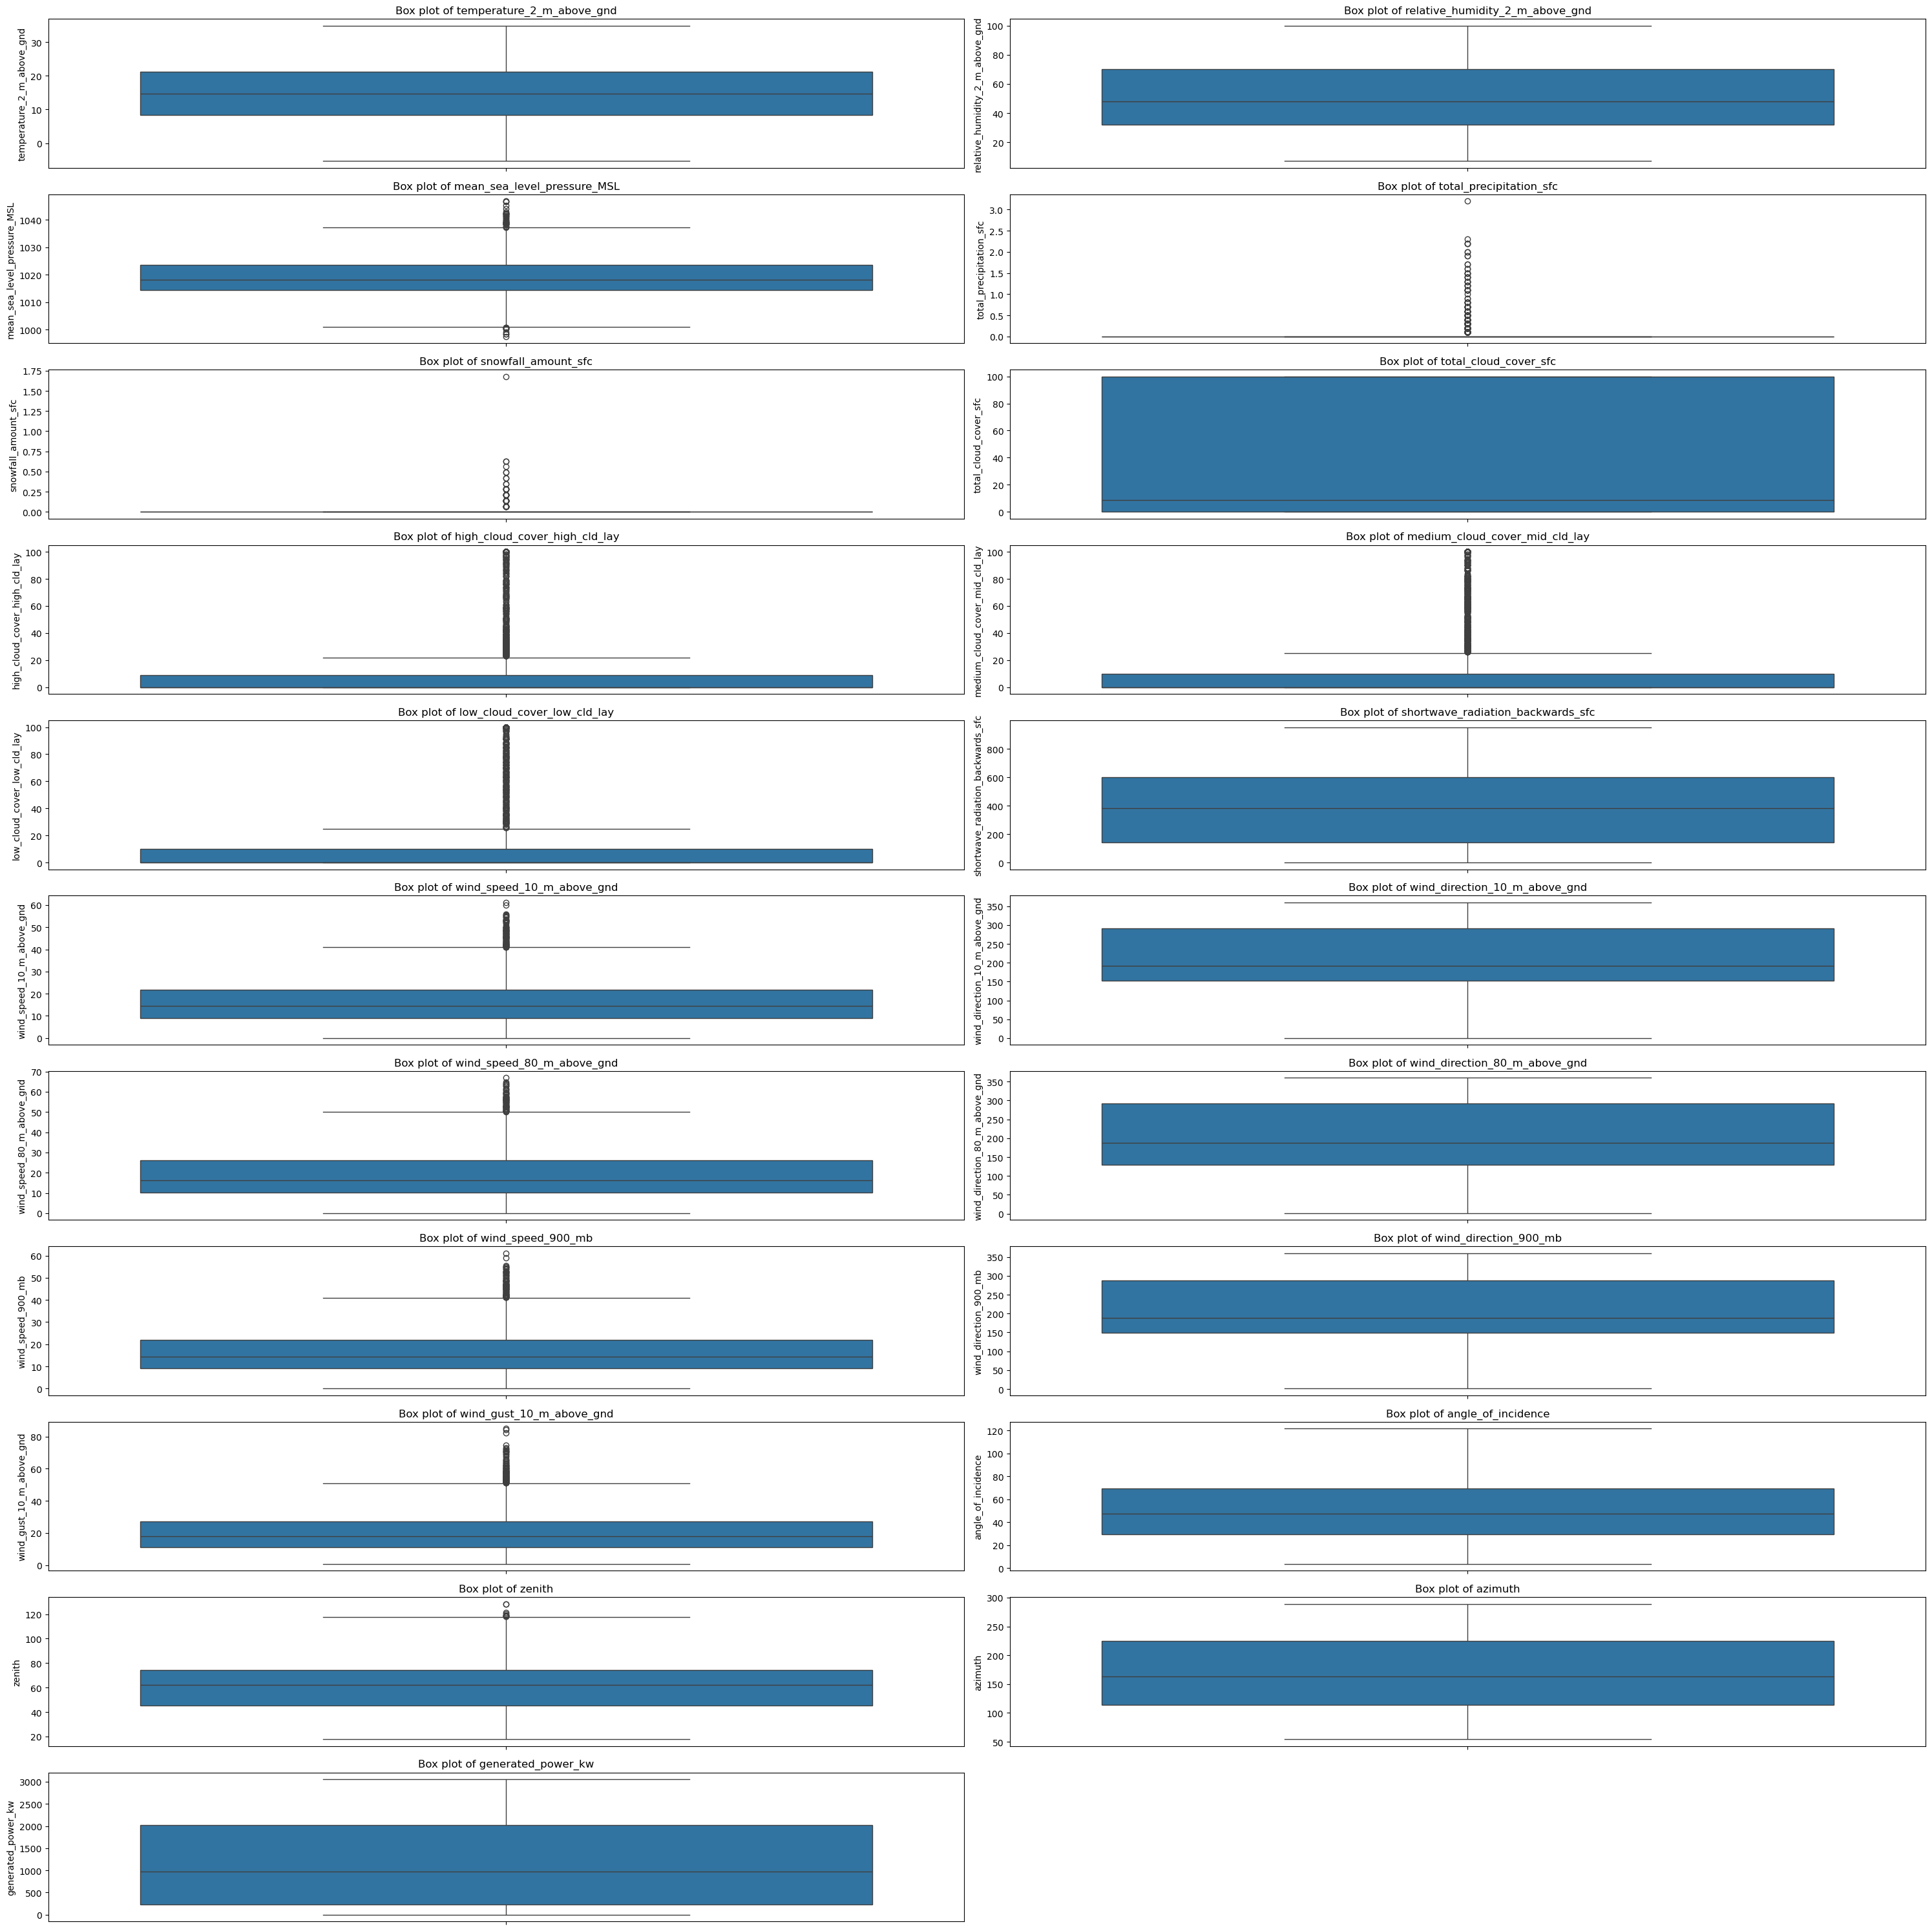

In [23]:
## Checking for outliers by plotting boxplots

numeric_columns = df.select_dtypes(include=np.number).columns # It selects only numeric columns 
num_cols = len(numeric_columns) # detecting the number of numeric columns 

plt.figure(figsize=(30, 30))


for index in range(num_cols):
     # Create subplots in a grid
      # it includes rows,columns,position 
    plt.subplot(((num_cols+1)//2),2,index+1) 
    sns.boxplot(y=df[numeric_columns[index]])
    plt.title(f'Box plot of {numeric_columns[index]}')

plt.tight_layout()
plt.show()


By plotting boxplots we get to know that there are significant outliers in certain features like Mean_sea_level_pressure_MSL  ,total_precipitation_sfc ,snowfall_amount_sfc , high_cloud_cover_high_cld_lay ,medium_cloud_cover_mid_cld_lay ,  low_cloud_cover_low_cld_lay , wind_speed_10_m_above_gnd , wind_speed_80_m_above_gnd , wind_speed_900_mb , wind_gust_10_m_above_gnd , zenith  

In [25]:
# List of columns with significant outliers
list = ['mean_sea_level_pressure_MSL', 'total_precipitation_sfc', 'snowfall_amount_sfc',
                         'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay', 
                         'low_cloud_cover_low_cld_lay', 'wind_speed_10_m_above_gnd', 
                         'wind_speed_80_m_above_gnd', 'wind_speed_900_mb', 
                         'wind_gust_10_m_above_gnd', 'zenith']

# Capping outliers based on the IQR method
for idx in list:
    Q1 = df[idx].quantile(0.25)  # 25th percentile
    Q3 = df[idx].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df[idx] = np.where(df[idx] < lowerBound, 
                       lowerBound, 
                       np.where(df[idx] > upperBound, 
                                upperBound, 
                                df[idx]))


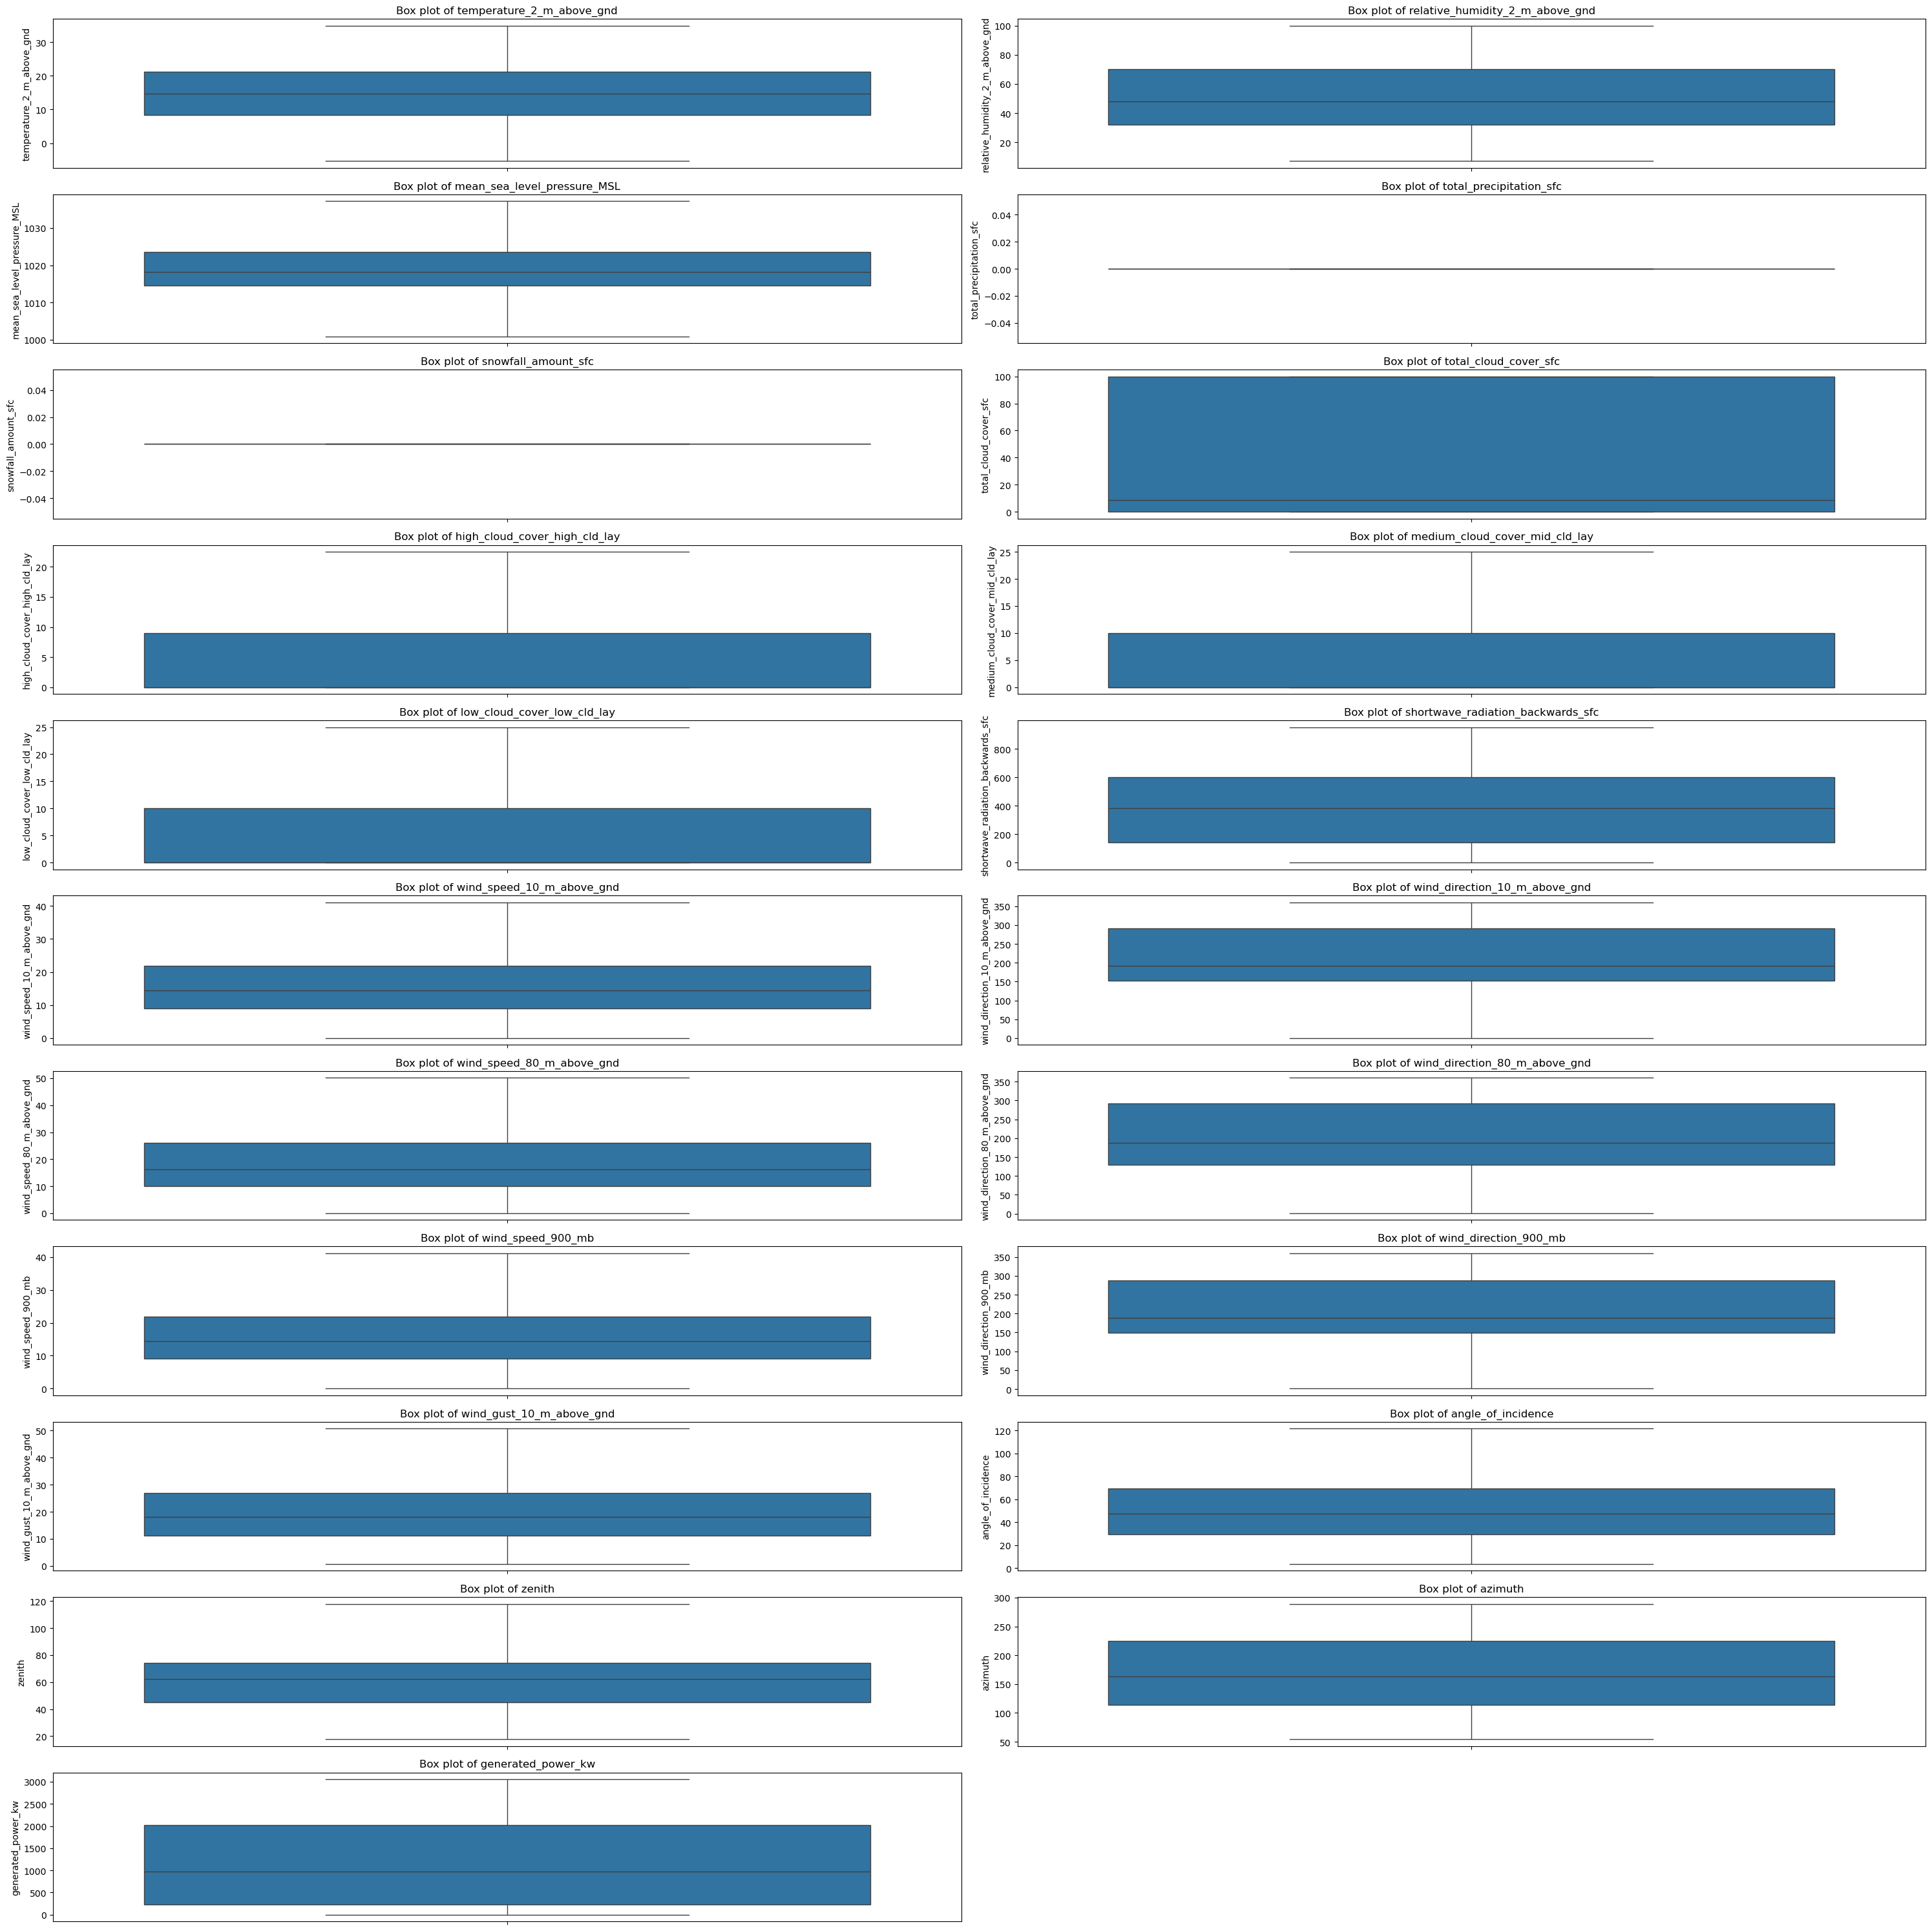

In [26]:
##  Again Checking for outliers  whether they are treated or not by plotting boxplots

numeric_columns = df.select_dtypes(include=np.number).columns # It selects only numeric columns 
num_cols = len(numeric_columns) # detecting the number of numeric columns 

plt.figure(figsize=(30, 30))


for index in range(num_cols):
     # Create subplots in a grid
      # it includes rows,columns,position 
    plt.subplot(((num_cols+1)//2),2,index+1) 
    sns.boxplot(y=df[numeric_columns[index]])
    plt.title(f'Box plot of {numeric_columns[index]}')

plt.tight_layout()
plt.show()


Hence all the outliers have been capped and data has been cleaned i.e. no null values and outliers...


### 4. EDA

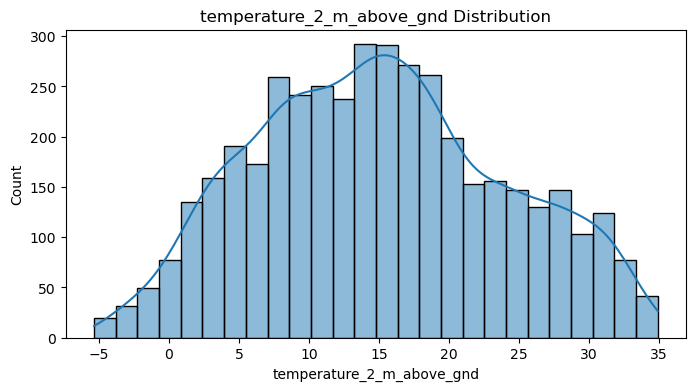

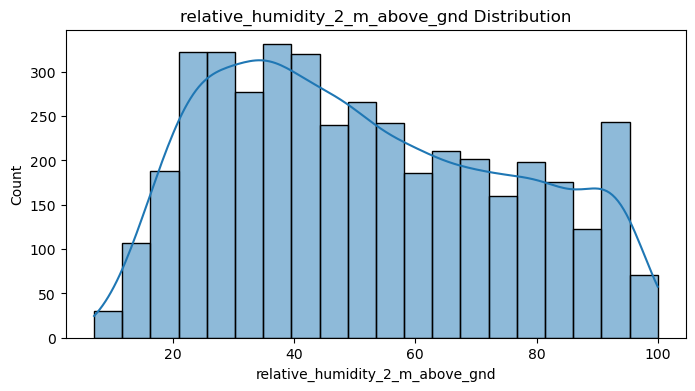

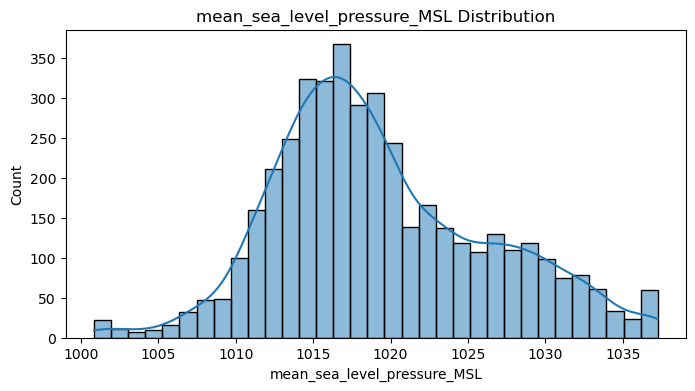

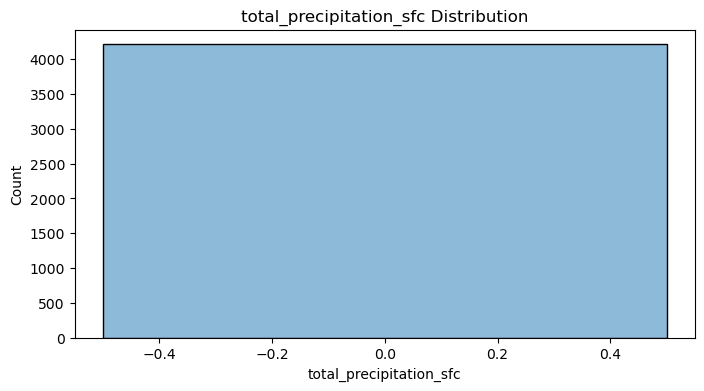

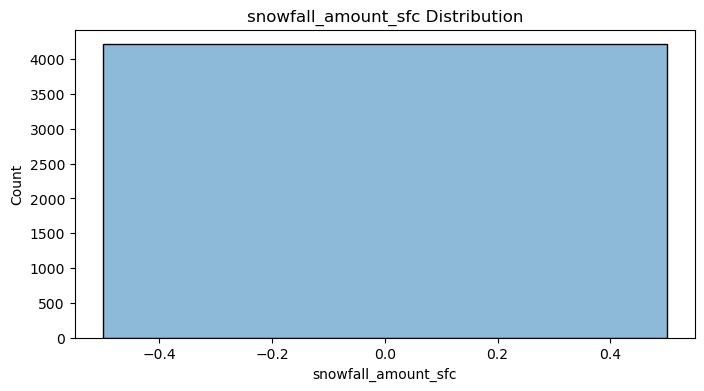

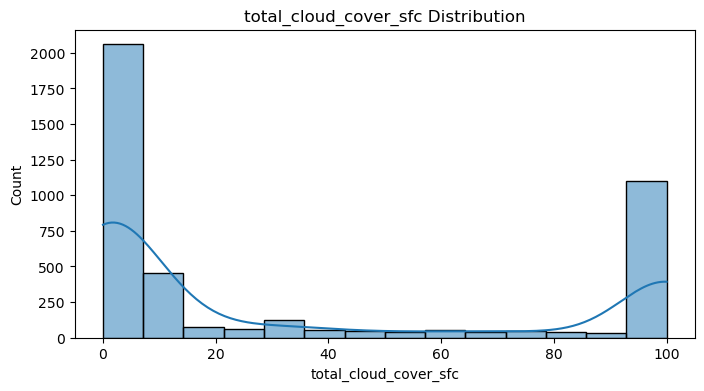

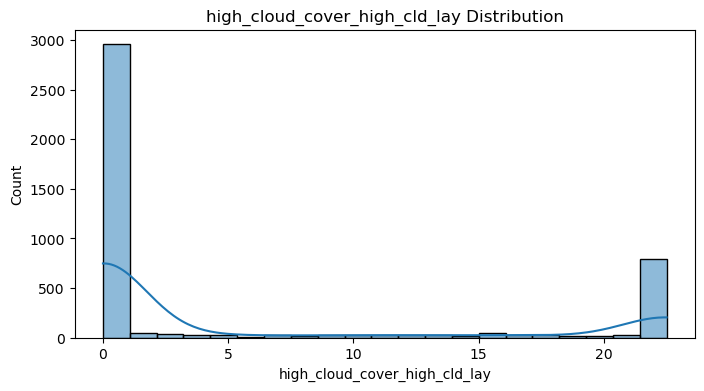

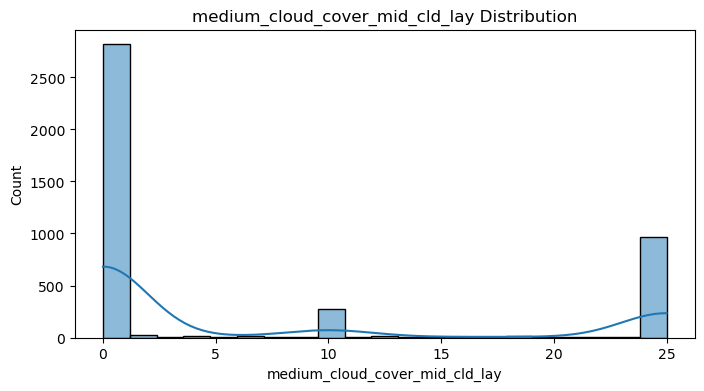

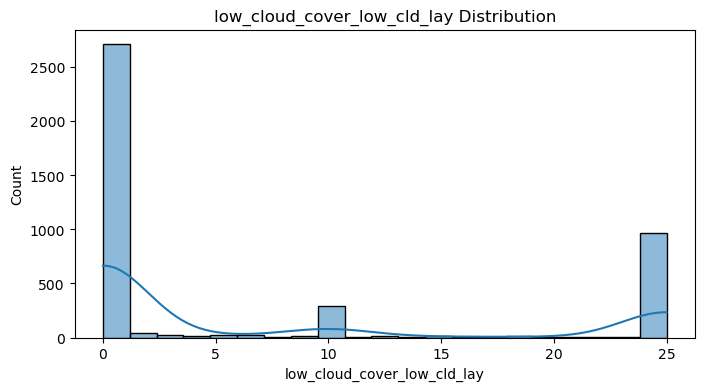

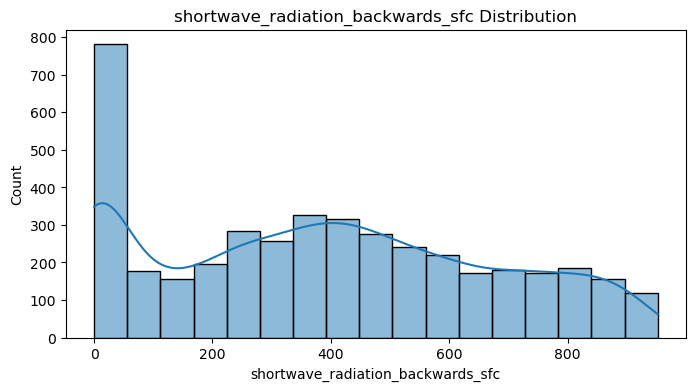

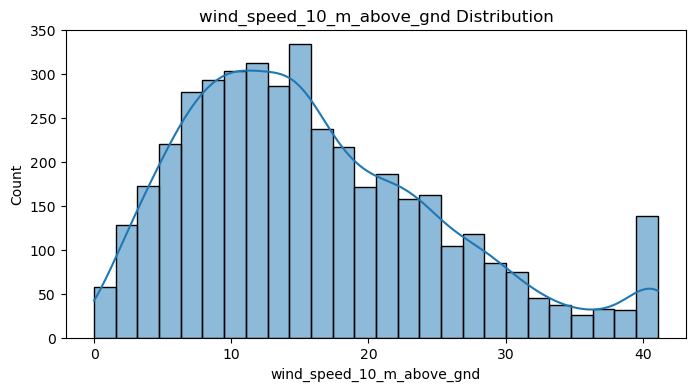

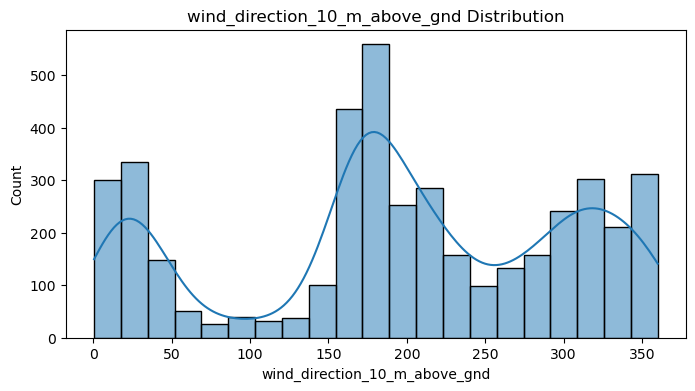

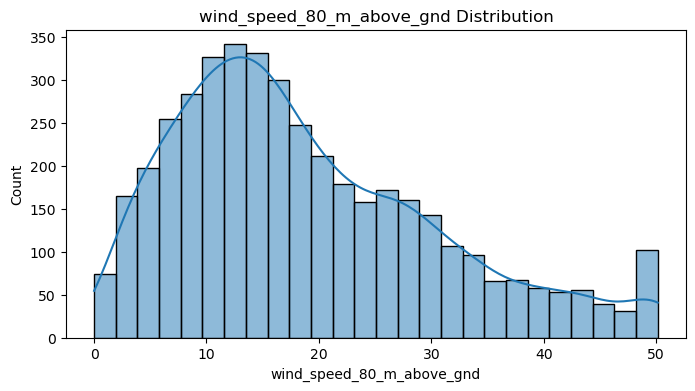

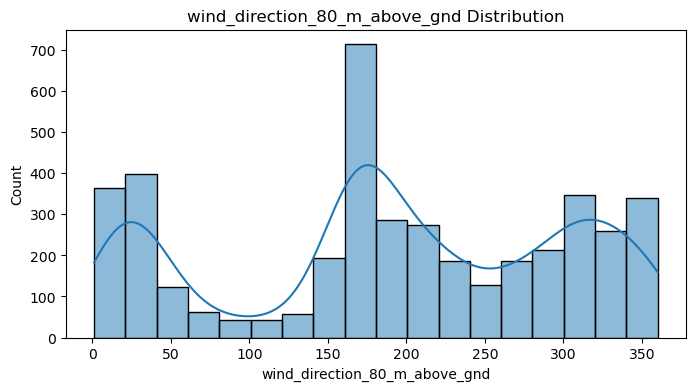

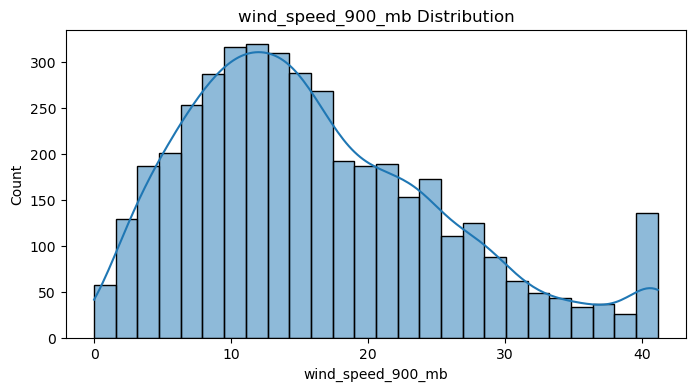

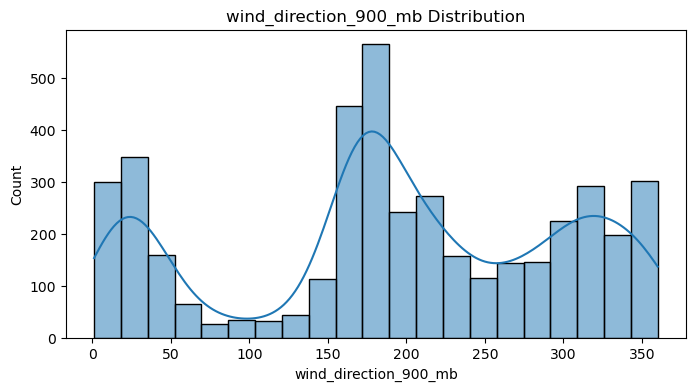

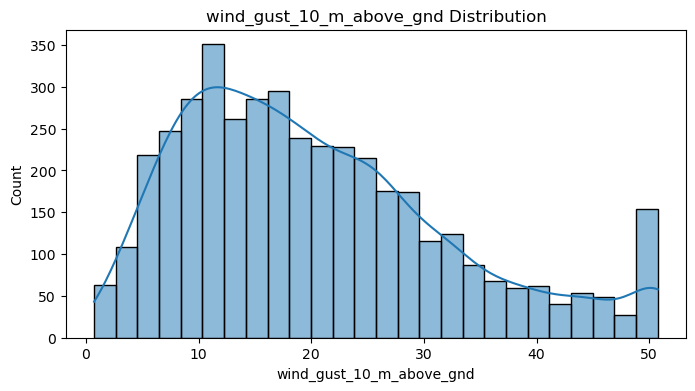

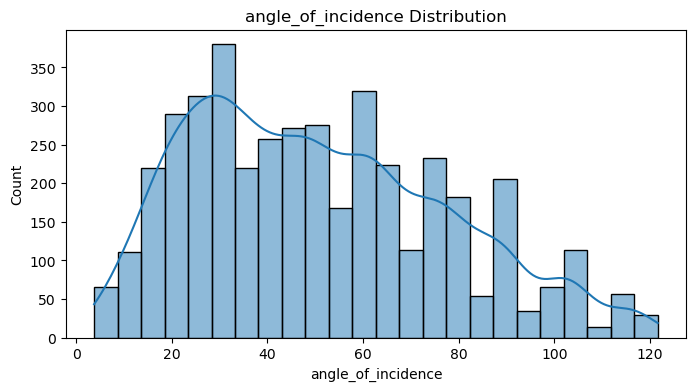

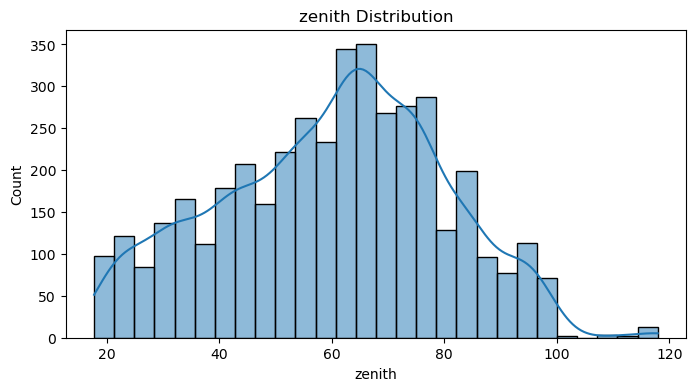

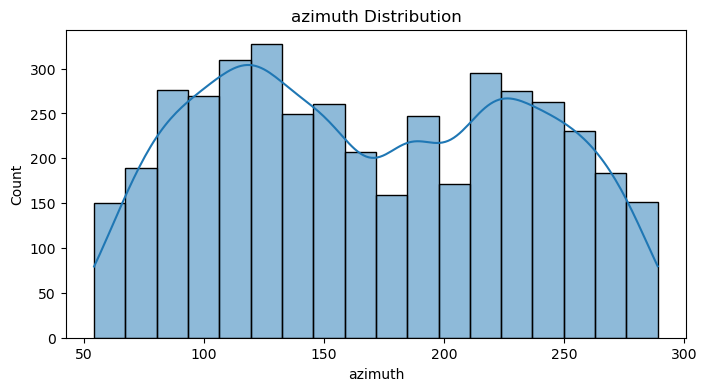

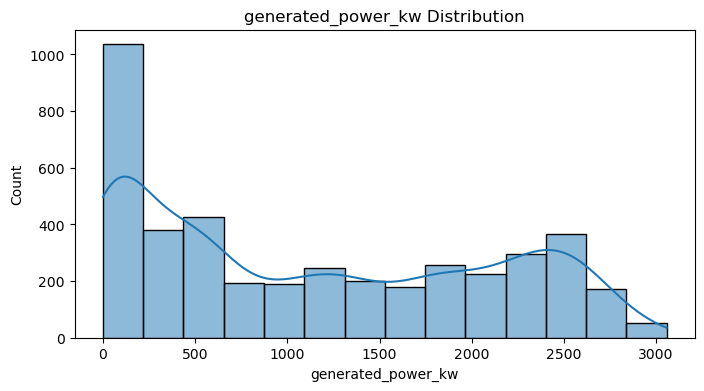

In [29]:

numeric_columns = df.select_dtypes(include=np.number).columns # It selects only numeric columns 
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()


In [30]:
correlation = df[numeric_columns].corr()
print(correlation)

                                   temperature_2_m_above_gnd  \
temperature_2_m_above_gnd                           1.000000   
relative_humidity_2_m_above_gnd                    -0.771704   
mean_sea_level_pressure_MSL                        -0.403301   
total_precipitation_sfc                                  NaN   
snowfall_amount_sfc                                      NaN   
total_cloud_cover_sfc                              -0.326641   
high_cloud_cover_high_cld_lay                      -0.021731   
medium_cloud_cover_mid_cld_lay                     -0.078821   
low_cloud_cover_low_cld_lay                        -0.372976   
shortwave_radiation_backwards_sfc                   0.665755   
wind_speed_10_m_above_gnd                          -0.160235   
wind_direction_10_m_above_gnd                       0.051393   
wind_speed_80_m_above_gnd                          -0.241714   
wind_direction_80_m_above_gnd                       0.086630   
wind_speed_900_mb                       

1.  #### Change in temperature_2_m_above_gnd affect the generated_power_kw
2. relative_humidity_2_m_above_gnd has no correlation with generated_power_kw
3. #### mean_sea_level_pressure_MSL affects generated_power_kw
4. total_precipitation_sfc  ,snowfall_amount_sfc does not affect generated_power_kw
5. total_cloud_cover_sfc,high_cloud_cover_high_cld_lay ,medium_cloud_cover_mid_cld_lay , low_cloud_cover_low_cld_lay no impact on generated power
6. #### shortwave_radiation_backwards_sfc  affects generated power
7. wind direction , wind speed , wind gust does not affect the  generaed_power_kw
8. angle_of_incidence , zenith , azimuth  has no affect 

### Now trying to derive the relation between temperautre and generated power, mean sea level and generated power , shortwave_radiation and generated power


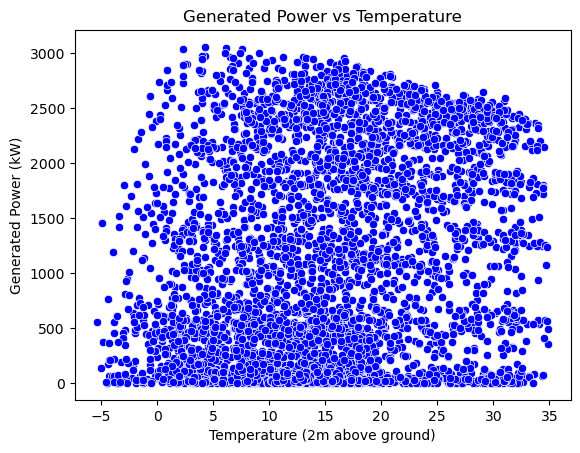

In [33]:
# Temperature vs. Generated Power
sns.scatterplot(x='temperature_2_m_above_gnd', y='generated_power_kw', data=df, color='b')
plt.title('Generated Power vs Temperature')
plt.xlabel('Temperature (2m above ground)')
plt.ylabel('Generated Power (kW)')
plt.show()

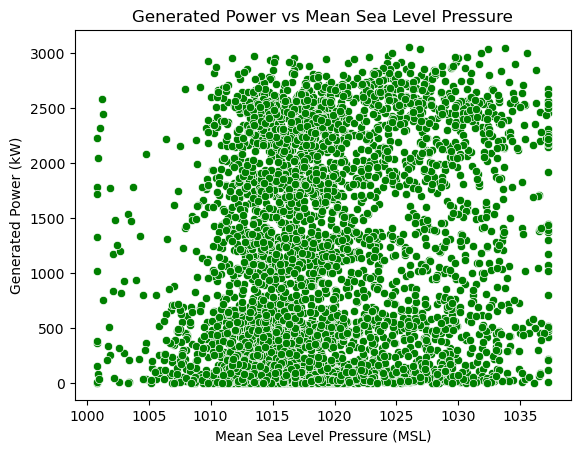

In [34]:
# Pressure vs. Power
sns.scatterplot(x='mean_sea_level_pressure_MSL', y='generated_power_kw', data=df, color='green')
plt.title('Generated Power vs Mean Sea Level Pressure')
plt.xlabel('Mean Sea Level Pressure (MSL)')
plt.ylabel('Generated Power (kW)')
plt.show()

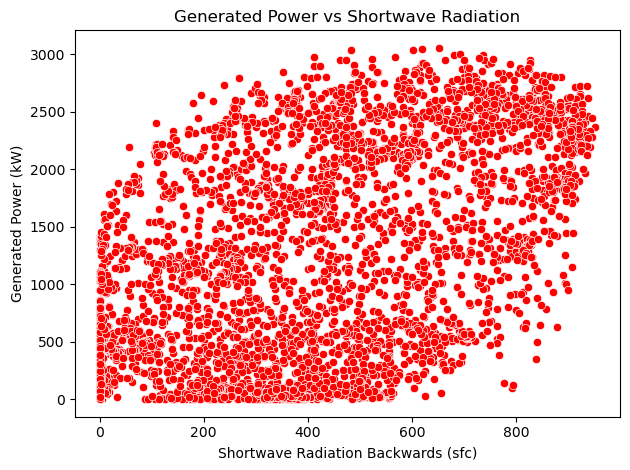

In [35]:

# Shortwave Radiation vs. Power
sns.scatterplot(x='shortwave_radiation_backwards_sfc', y='generated_power_kw', data=df, color='red')
plt.title('Generated Power vs Shortwave Radiation')
plt.xlabel('Shortwave Radiation Backwards (sfc)')
plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()



### Model Testing and Training

### 1.Linear Regression

In [593]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [595]:
# Splitting the data 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [597]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [599]:
# Initialize and fit the scaler on the training data, then transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [601]:
# Initialize the Linear Regression model and fit it to the scaled training data
lr = LinearRegression()
lr.fit(X_train_scaled , y_train)

LinearRegression()

In [603]:
# Predict on the scaled test set
y_pred = lr.predict(X_test_scaled)

#### Acurracy of model

In [605]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2LR = r2_score(y_test , y_pred)*100

In [607]:
print( "The accuracy score of linear regression model is", r2LR)

The accuracy score of linear regression model is 73.05510367603101


### 2. Decision Tree

In [254]:
# Splitting the data 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [661]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [663]:
# Initialize and fit the scaler on the training data, then transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [665]:
from sklearn.tree import DecisionTreeRegressor
DT= DecisionTreeRegressor()        ## object instanciation
DT.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [667]:
y_predDT = DT.predict(X_test_scaled)

In [669]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ME = mean_absolute_error(y_test, y_predDT)
MS = mean_squared_error(y_test, y_predDT)
r2DT = r2_score(y_test, y_predDT)

print("mean absolute error is:", ME)
print("mean squared error is :", MS)
print("R2 score is ", r2DT*100,"%")

mean absolute error is: 339.6850144662788
mean squared error is : 334193.6289755772
R2 score is  62.19642194764017 %


### 3. Random Forest

In [ ]:
# Splitting the data 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [479]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [481]:
# Initialize and fit the scaler on the training data, then transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [483]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [484]:
y_predrf = rf.predict(X_test_scaled)

In [485]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MErf = mean_absolute_error(y_test, y_predrf)
MSrf = mean_squared_error(y_test, y_predrf)
r2rf = r2_score(y_test, y_predrf)

print("mean absolute error is:", MErf)
print("mean squared error is :", MSrf)
print("R2 score is ", r2rf*100,"%")

mean absolute error is: 262.90446996017295
mean squared error is : 168837.41649745352
R2 score is  80.90131618521454 %


### 4. Gradient Boosting 

In [ ]:
# Splitting the data 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [575]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [577]:
# Initialize and fit the scaler on the training data, then transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [579]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [580]:
y_predgb = gb.predict(X_test_scaled)

In [581]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MEgb = mean_absolute_error(y_test, y_predgb)
MSgb = mean_squared_error(y_test, y_predgb)
r2gb = r2_score(y_test, y_predgb)

print("mean absolute error is:", MEgb)
print("mean squared error is :", MSgb)
print("R2 score is ", r2gb*100,"%")

mean absolute error is: 278.03617906347995
mean squared error is : 162292.08068533815
R2 score is  81.09067267406765 %


##### Most suitable algorithm for this data would be Gradient Boosting as 
1. R2 score of gradient boosting is 81.09%
2.  R2 score of Random Forest is 80.90%
3.   R2 score of Decision Tree is 64.70%
4.    R2 score of Linear Regression is 73.055%
    As the accuracy is more so it is more preffered
  

Gradient Boosting combines multiple weak learners (typically decision trees) to create a strong predictive model. Each new tree attempts to correct the errors of the previous ones, resulting in high accuracy and improved performance.

Flexibility with Data: This model is versatile and can be used for both classification and regression tasks. It can handle datasets with a mix of numerical and categorical variables, making it flexible in various applications.

Handles Non-linear Relationships: Gradient Boosting is particularly suitable for datasets with complex, non-linear relationships. Since each tree focuses on residual errors from the previous ones, the model gradually builds a stronger fit, capturing intricate patterns in the data.

Feature Importance: Gradient Boosting models offer insights into which features are most influential in making predictions. This is helpful for understanding the underlying factors affecting the target variable, especially when the dataset contains multiple predictors.